# Gradient Boosting Machines(GBM)

AdaBoostun sınıflandırma ve regresyon progremlerine kolayva uyarlanabilien genelleştirilmiş versyonudur

Artıklar üzerinde tek bir tahminsel model formunda olan modeller serisi kurulur.

Zayıf öğreniciler bir araya getirilip güçlü bir öğrenci ortaya çıkartmak fikrine dayanır

AdaBoost ile Zayıf sınıflandırıcıların bir ataya gelerek güçlü bir sınıflandırıcı oluşturmasu fikrini hayata geçiren algoritmadır.

 Gbm AdaBoostun sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. Artıkar üzerinde tek bir tahminsel model formunda olan modeller serisi kurulur.

In [11]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [12]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
#Veri setindeki kategorik değişkenler için dummy değişkenler oluşturduk
#One hot encoding yöntemi ile.
y = df["Salary"] #Bağımlı değişkenimiz
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
#Veri setimizdeki bağımlı değişken ve kategorik değişkenlerimizin orjinal hallerini uçurduk
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
#Bu kategorik değişkenlerin dummy versyonlarını ve diğer bağımsız
#değişken değerlerimizi bir arada tutarak bağımsız değişkenlerimizi
#X olarak oluşturmuş olduk
X_train,X_test,y_train,y_test  =train_test_split(X,y,test_size = 0.25,random_state=42)

### Model Ve Tahmin

In [13]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [14]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
y_pred = gbm_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.635814975062

### Model Tuning

In [17]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [18]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
gbm_params = {"learning_rate":[0.001,0.1,0.01],
             "max_depth":[3,5,8],
             "n_estimators":[100,200,500],
             "subsample":[1,0.5,0.8],
             "loss" : ["ls","lad","quantile"]}

In [22]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv = 10 ,n_jobs = -1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  3.4min finished


In [23]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [34]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "ls",
                                     max_depth = 5,
                                     n_estimators = 100,
                                     subsample = 0.5).fit(X_train,y_train)

In [35]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

343.45906310948766

In [36]:
#Degiskenlerin önem düzeyleri

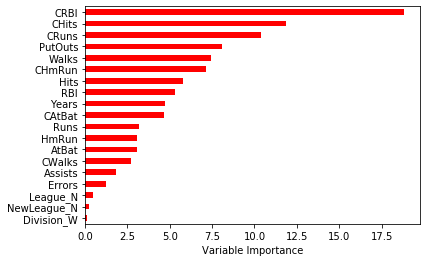

In [38]:
Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh",
                                            color = "r",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None